In [1]:
import subprocess, nibabel as nib, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib.colors

In [2]:
cd /mnt/c/Users/xavie/Dropbox\ \(MIT\)/MIT/_ACTIVE_PROJECTS/Dong_SZgradients/cerebellar_cerebralcortical_inCerebralCortex

/mnt/c/Users/xavie/Dropbox (MIT)/MIT/_ACTIVE_PROJECTS/Dong_SZgradients/cerebellar_cerebralcortical_inCerebralCortex


In [9]:
## CEREBELLAR CORTEX - TO - CEREBELLAR CORTEX GRADIENT 1

# generate a cerebellar cortical mask from our eLife paper results
subprocess.check_output("fslmaths mask_crebral_cortex.nii -bin mask_positive.nii.gz", shell=True);
subprocess.check_output("fslmaths mask_crebral_cortex.nii -mul -1 -bin mask_negative.nii.gz", shell=True);
subprocess.check_output("fslmaths mask_negative.nii.gz -add mask_positive.nii.gz mask.nii.gz", shell=True);

# multiply files sent by Debo by 99999 so that they do not lose resolution when masking
subprocess.check_output("fslmaths HC_Mean.nii -mul 99999 mean_hc_mul99999.nii.gz", shell=True);
subprocess.check_output("fslmaths SZ_Mean.nii -mul 99999 mean_sz_mul99999.nii.gz", shell=True);
subprocess.check_output("fslmaths SZ_HC_T2_4mm_fdr_10.nii -mul 99999 sz_hc_fdr10_mul99999.nii.gz", shell=True);

# mask files based on this mask, using freesurfer's mri_mask
subprocess.check_output("mri_mask mean_hc_mul99999.nii.gz mask.nii.gz mean_hc_mul99999_masked.nii.gz", shell=True);
subprocess.check_output("mri_mask mean_sz_mul99999.nii.gz mask.nii.gz mean_sz_mul99999_masked.nii.gz", shell=True);
subprocess.check_output("mri_mask sz_hc_fdr10_mul99999.nii.gz mask.nii.gz sz_hc_fdr10_mul99999_masked.nii.gz", shell=True);

# divide by 99999 again to go back to original scale
subprocess.check_output("fslmaths mean_hc_mul99999_masked.nii.gz -div 99999 mean_hc_masked.nii.gz", shell=True);
subprocess.check_output("fslmaths mean_sz_mul99999_masked.nii.gz -div 99999 mean_sz_masked.nii.gz", shell=True);
subprocess.check_output("fslmaths sz_hc_fdr10_mul99999_masked.nii.gz -div 99999 sz_hc_fdr10_masked.nii.gz", shell=True);


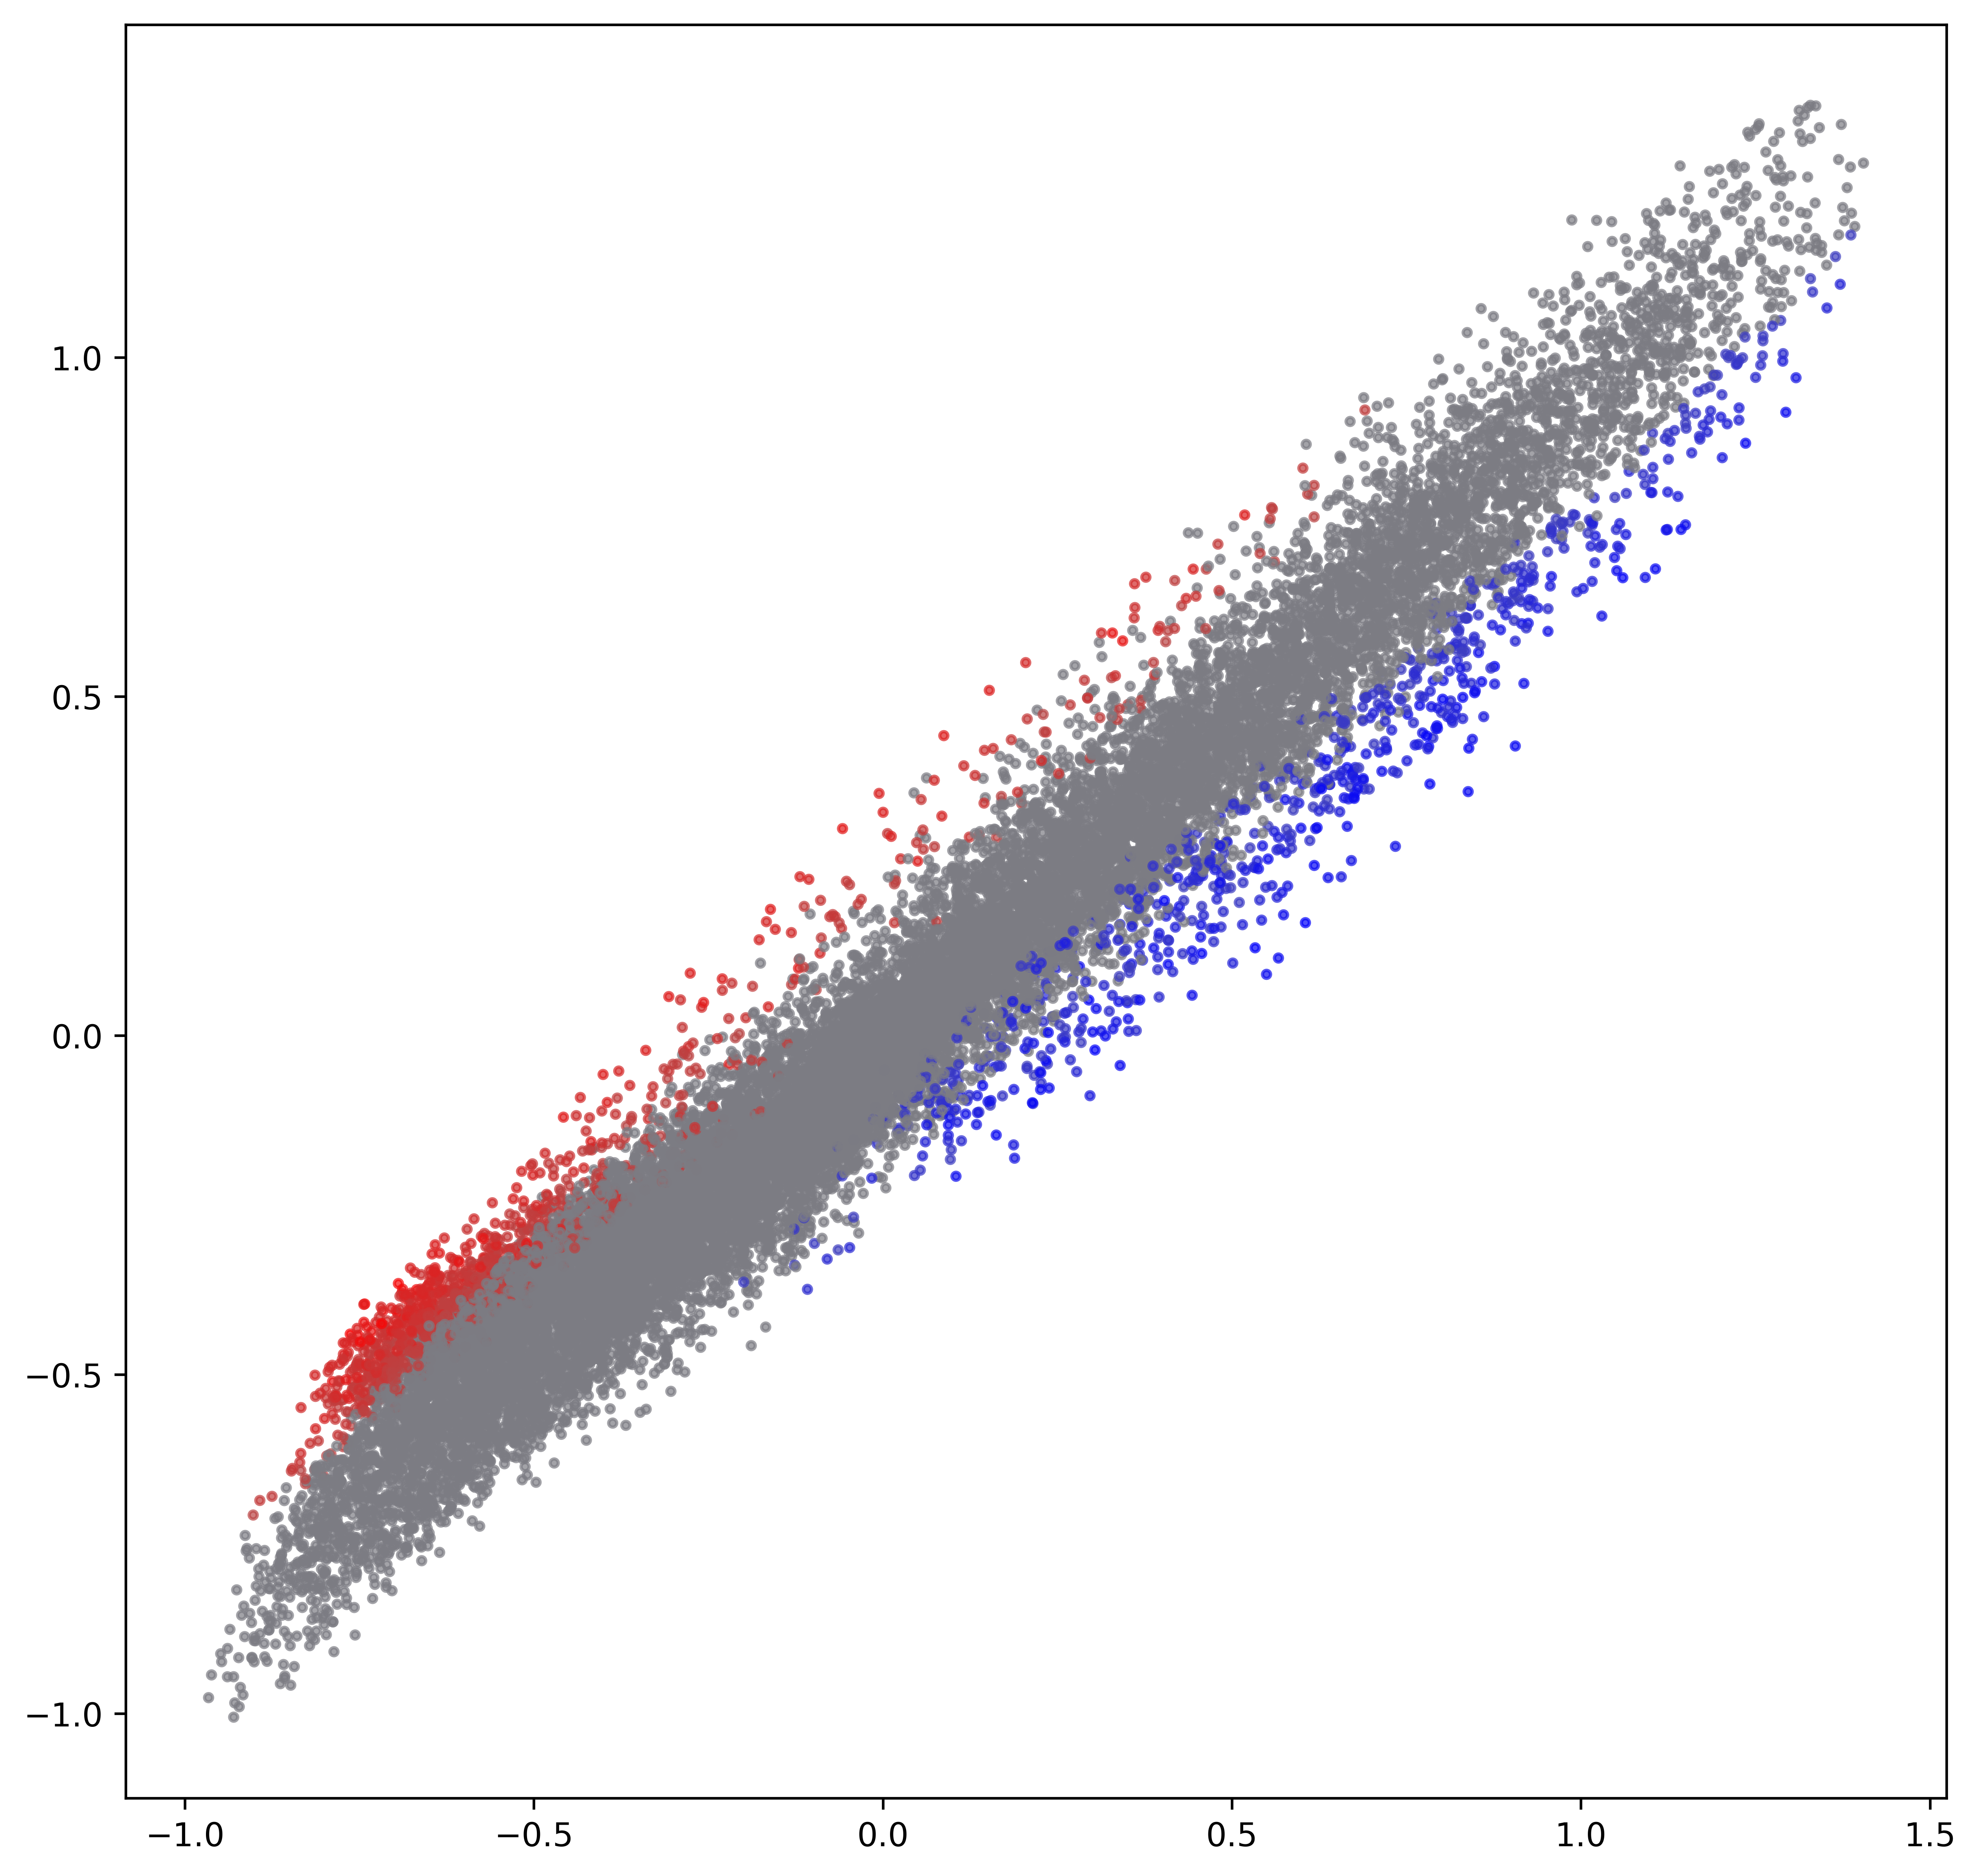

In [10]:
hc = nib.load('mean_hc_masked.nii.gz').get_data()
sz = nib.load('mean_sz_masked.nii.gz').get_data()
contrast = nib.load('sz_hc_fdr10_masked.nii.gz').get_data()

hc = np.ndarray.flatten(hc)
sz = np.ndarray.flatten(sz)
contrast = np.ndarray.flatten(contrast)

fig = plt.figure(figsize=(10,10), dpi=600)

contrast_mod = contrast.copy()
contrast_mod[contrast_mod>0] = 1
contrast_mod[contrast_mod<0] = -1

custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","grey","red"])
plt.scatter(hc, sz, c=contrast, cmap=custom_cmap, s=6, alpha=0.7)

plt.savefig('scatterplot_HCx_SZy_CerebellarCortexToCerebellarCortex_CalculatedInCerebralCortex.png')

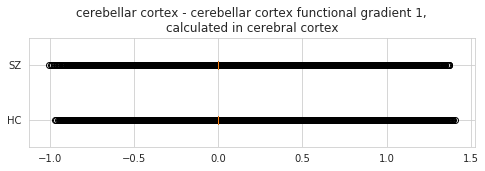

In [11]:
hc = nib.load('mean_hc_masked.nii.gz').get_data()
sz = nib.load('mean_sz_masked.nii.gz').get_data()

hc = np.ndarray.flatten(hc)
sz = np.ndarray.flatten(sz)

sns.set_style("whitegrid")
plt.figure(figsize=(8,2))

plt.title('cerebellar cortex - cerebellar cortex functional gradient 1,\ncalculated in cerebral cortex')

plt.boxplot([hc, sz], vert=False, )
plt.yticks([1, 2], ['HC', 'SZ'])

plt.savefig('compression_CerebellarCortexToCerebellarCortex_CalculatedInCerebralCortex.png')

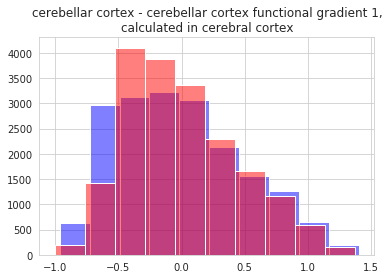

In [12]:
hc = nib.load('mean_hc_masked.nii.gz').get_data()
sz = nib.load('mean_sz_masked.nii.gz').get_data()

hc_no0 = hc[hc!=0].copy()
sz_no0 = sz[sz!=0].copy()

plt.hist(hc_no0,fc=(0, 0, 1, 0.5))
plt.hist(sz_no0, fc=(1, 0, 0, 0.5))
plt.title('cerebellar cortex - cerebellar cortex functional gradient 1,\ncalculated in cerebral cortex')


plt.savefig('compression_CerebellarCortexToCerebellarCortex_BlueHC_RedSZ_CalculatedInCerebralCortex.png')